# Example Visualization with SOMs

### Imports

In [33]:
import seaborn.objects as so
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dbgsom import DBGSOM
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale
from sklearn.metrics import pairwise_distances_argmin_min


### Defining and fitting the som

In [61]:
digits, target = load_digits(return_X_y=True)
digits = scale(digits)
som = DBGSOM(
    # max_neurons=100,
    sf=0.3,
    n_epochs_max=70,
    random_state=42
)
som.fit(digits)


 79%|███████▊  | 55/70 [00:04<00:01, 12.90 epochs/s]


DBGSOM(max_neurons=10000000000, n_epochs_max=70, random_state=42, sf=0.3)

### Plotting results

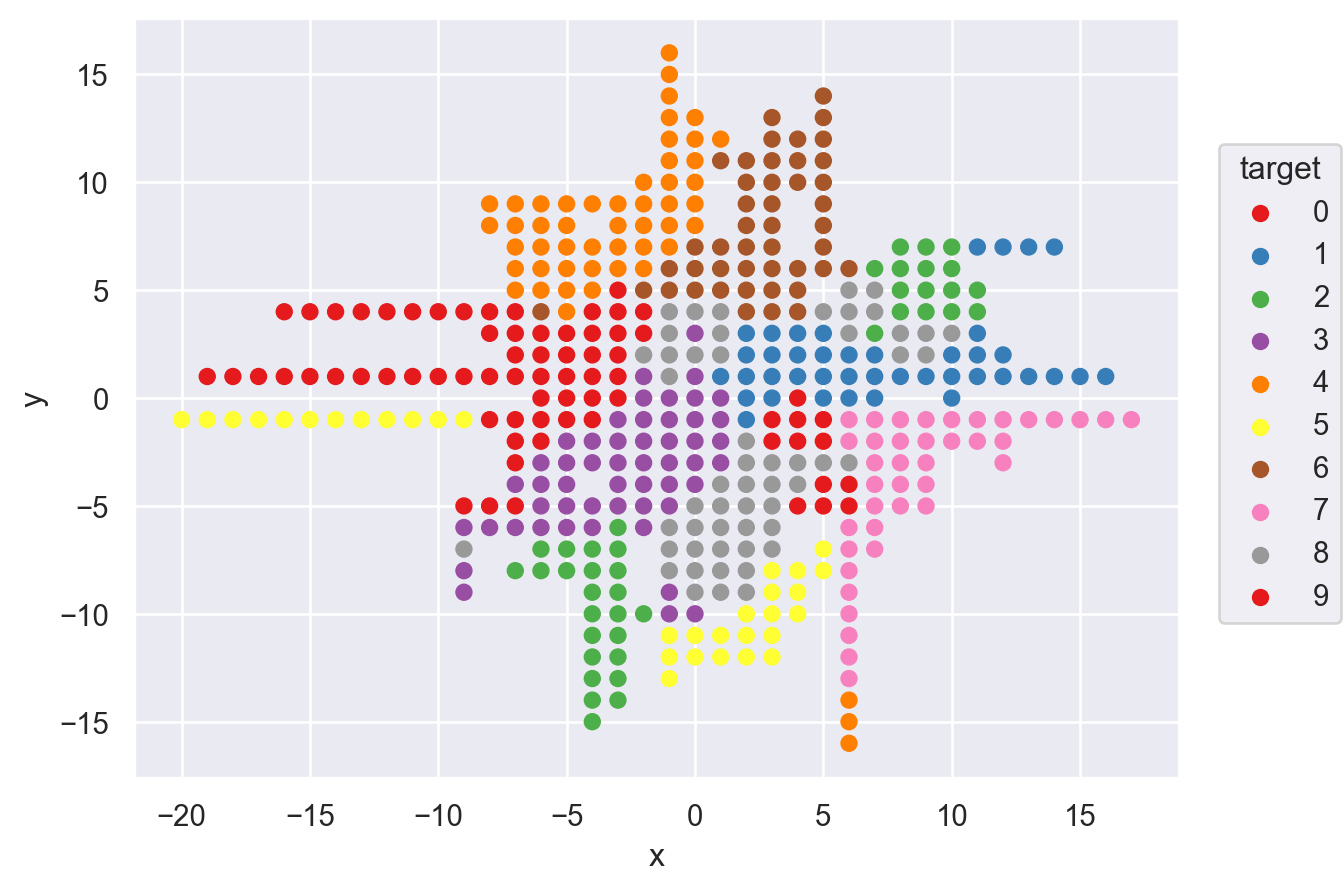

In [62]:
nn, distances = pairwise_distances_argmin_min(som.weights_, digits)
edges = list(som.som_.edges)
weights = som.weights_
dots = pd.DataFrame(np.array(som.neurons_), columns=["x", "y"])
dots["epoch_created"] = list(dict(som.som_.nodes.data("epoch_created")).values())
dots["error"] = list(dict(som.som_.nodes.data("epoch_created")).values())
dots["target"] = target[nn]
so.Plot(dots, x="x", y="y", color="target").add(so.Dot()).scale(color="Set1")


In [112]:
som2 = DBGSOM(
    max_neurons=100,
    sf=0.3,
    n_epochs_max=70,
    random_state=42
)
som2.fit(digits)


 83%|████████▎ | 58/70 [00:00<00:00, 65.75 epochs/s]


DBGSOM(max_neurons=100, n_epochs_max=70, random_state=42, sf=0.3)

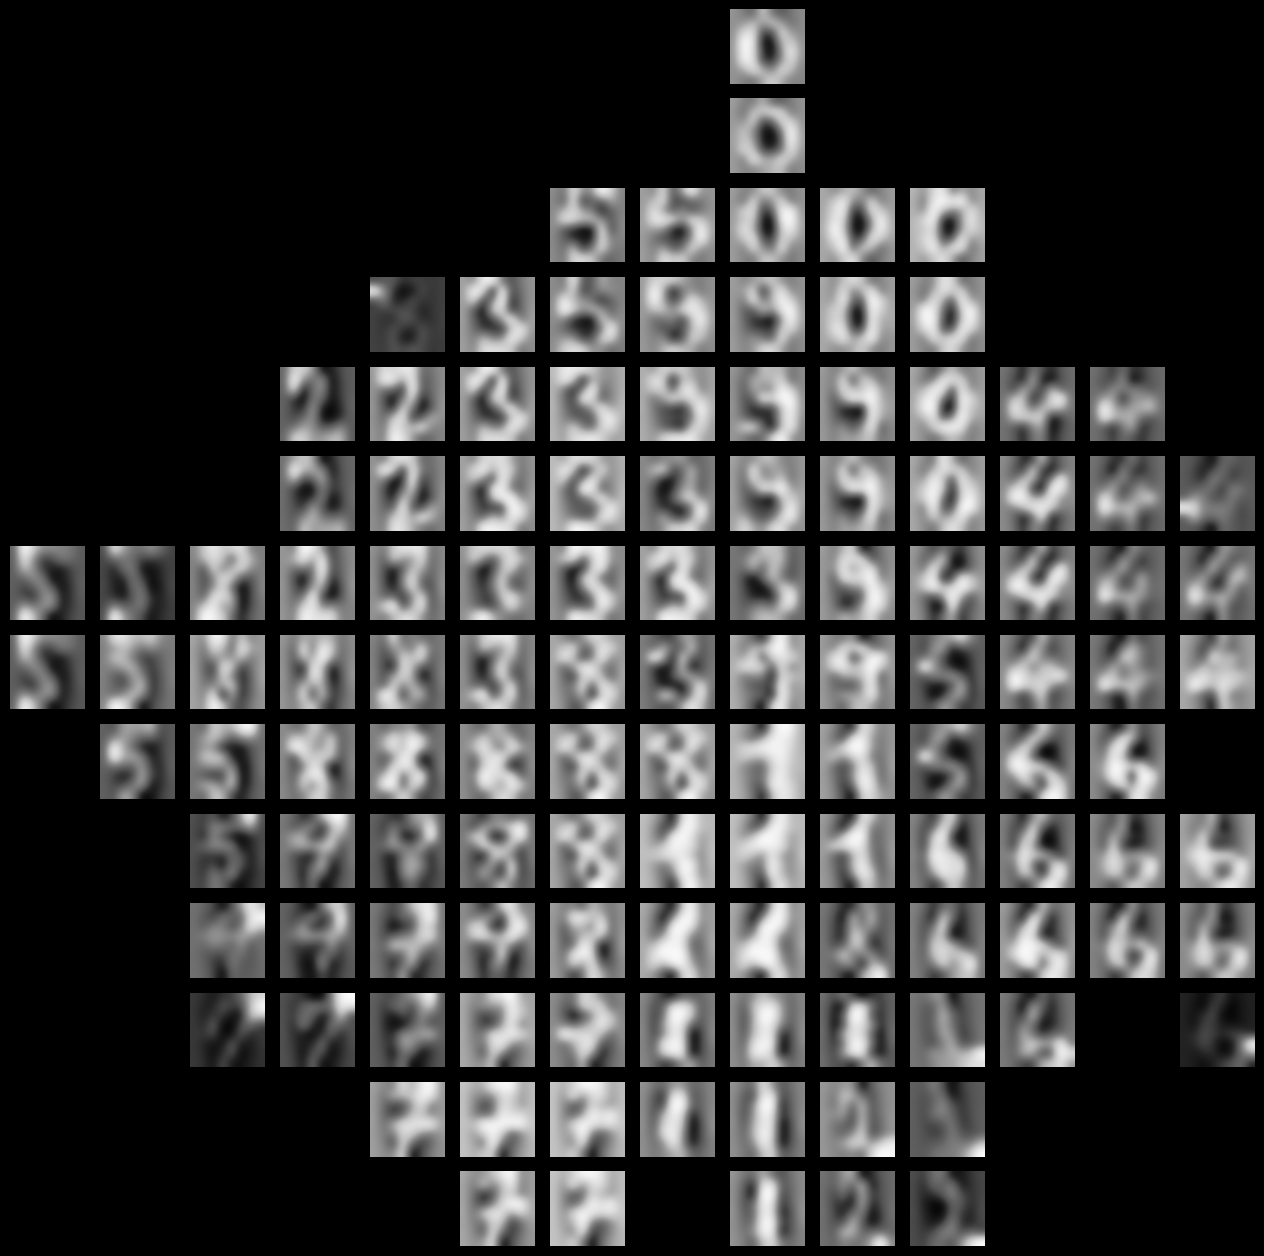

In [135]:
from matplotlib.gridspec import GridSpec
plt.figure(figsize=(30, 30))

min, max = (np.array(som2.neurons_).min(), np.array(som2.neurons_).max())
nn, distances = pairwise_distances_argmin_min(som2.weights_, digits)

dim = abs(max-min)
gs = GridSpec(2*dim, 2*dim)
for index, neuron in enumerate(som2.neurons_):
    neuron += dim
    plt.subplot(gs[neuron[0], neuron[1]])
    plt.imshow(digits[nn[index]].reshape(8, 8), cmap="Greys_r", interpolation="bicubic")
    plt.axis('off')

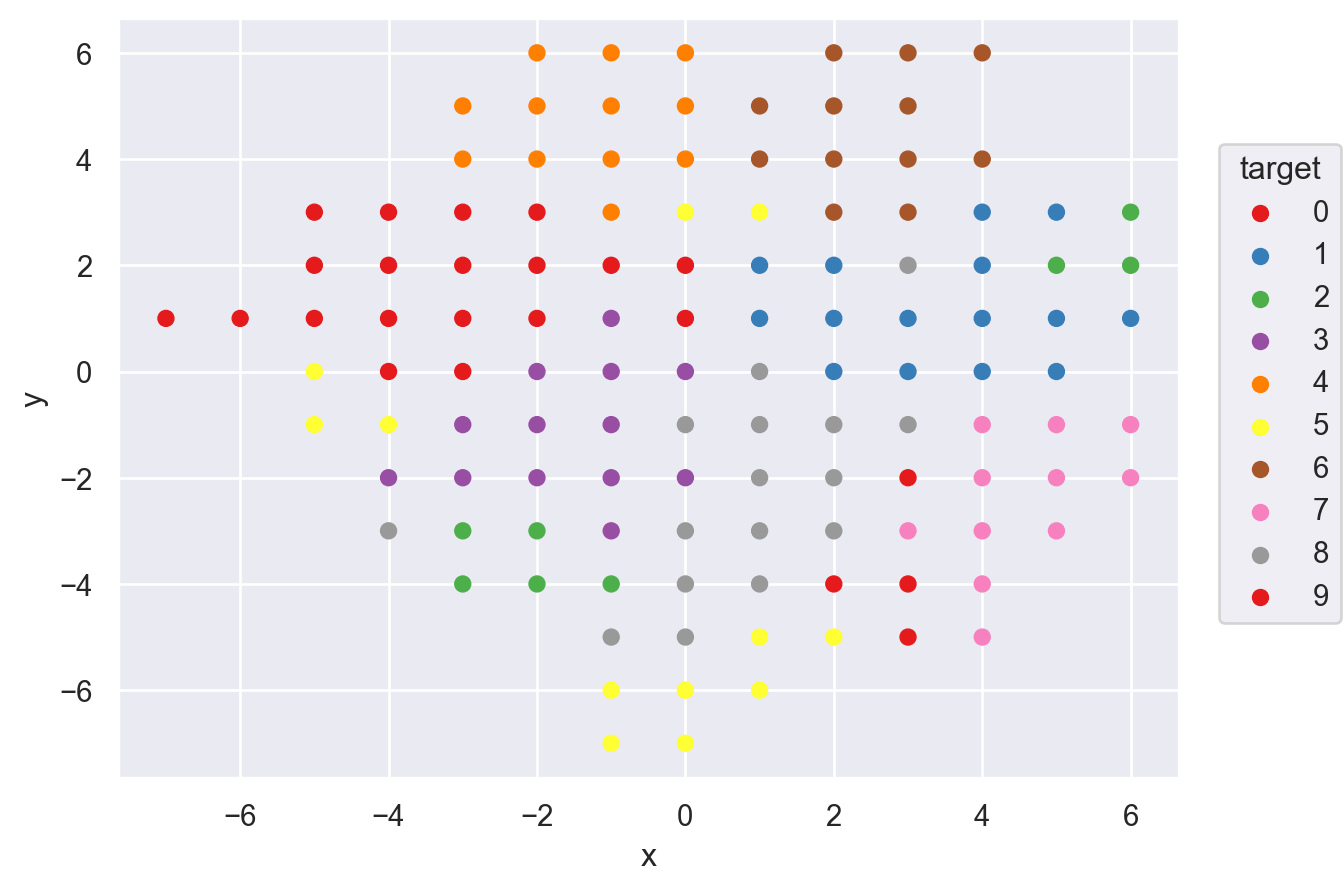

In [128]:
nn, distances = pairwise_distances_argmin_min(som2.weights_, digits)
edges = list(som2.som_.edges)
weights = som2.weights_
dots = pd.DataFrame(np.array(som2.neurons_), columns=["x", "y"])
dots["epoch_created"] = list(dict(som2.som_.nodes.data("epoch_created")).values())
dots["error"] = list(dict(som2.som_.nodes.data("epoch_created")).values())
dots["target"] = target[nn]
so.Plot(dots, x="x", y="y", color="target").add(so.Dot()).scale(color="Set1")
